# Topic Modeling with LDA and NMF
This notebook walks through loading, preprocessing, modeling, and visualizing topics in the Newsgroups dataset.

## 1. Install and Import Libraries

```bash
pip install nltk scikit-learn matplotlib wordcloud
```

In [1]:
import pickle
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## 2. Load the Newsgroups Dataset
Load the pickled dataset that was shared with us.

In [3]:
file_path = '/content/newsgroups'
with open(file_path, 'rb') as f:
    newsgroup_data = pickle.load(f)

# Extract documents
if isinstance(newsgroup_data, dict) and 'data' in newsgroup_data:
    docs = newsgroup_data['data']
else:
    docs = newsgroup_data

docs[:2]  # Show first two documents

["The best group to keep you informed is the Crohn's and Colitis Foundation\nof America.  I do not know if the UK has a similar organization.  The\naddress of\nthe CCFA is \n\nCCFA\n444 Park Avenue South\n11th Floor\nNew York, NY  10016-7374\nUSA\n\nThey have a lot of information available and have a number of newsletters.\n \nGood Luck.",
 '%>I dunno, Lemieux?  Hmmm...sounds like he\n%>has *French* blood in him!!!  Hey!  France is part of Europe!  Send that\n%>Euro-blooded boy back!!!\n%\n% Don\'t you Americans study history...the French settled in North America\n% as early or before the British...Lemieux can probably trace back his\n% North American heritage back a lot further than most of us.\n\n\n<friendly-jibe mode on>\n\nDon\'t you Canadians understand sarcasm?  Sometimes the reader must\ndecide that what he\'s reading is so ludicrous that it must mean\nthe opposite of what it said...\n\nKinda like the "Toronto\'s going to win the Cup" posts.  Yeah.  Right.\nAnd cows can fly...\n

## 3. Preprocessing
We'll lowercase, remove punctuation, remove stopwords, and lemmatize each document.

In [4]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    return " ".join(
        lemmatizer.lemmatize(w)
        for w in text.split()
        if w not in stop_words and len(w) > 2
    )

cleaned_docs = [preprocess(doc) for doc in docs]
cleaned_docs[:2]  # Preview cleaned docs

['best group keep informed crohn colitis foundation america know similar organization address ccfa ccfa 444 park avenue south 11th floor new york 10016 7374 usa lot information available number newsletter good luck',
 'dunno lemieux hmmm sound like french blood hey france part europe send euro blooded boy back american study history french settled north america early british lemieux probably trace back north american heritage back lot friendly jibe mode canadian understand sarcasm sometimes reader must decide reading ludicrous must mean opposite said kinda like toronto going win cup post yeah right cow fly friendly jibe mode geez gerald like anyone reading rec flamefest hockey pen great know mow quebec']

## 4. Vectorization
Create a CountVectorizer for LDA and a TfidfVectorizer for NMF.

In [5]:
n_topics = 10
count_vec = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf_vec = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)

count_data = count_vec.fit_transform(cleaned_docs)
tfidf_data = tfidf_vec.fit_transform(cleaned_docs)

## 5. Fit Models
We'll fit a 10-topic LDA and NMF model.

In [6]:
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
nmf = NMF(n_components=n_topics, random_state=0)

lda.fit(count_data)
nmf.fit(tfidf_data)

NMF(n_components=10, random_state=0)

## 6. Visualize Topics: Top Words
Plot the top 10 words for each topic in both models.

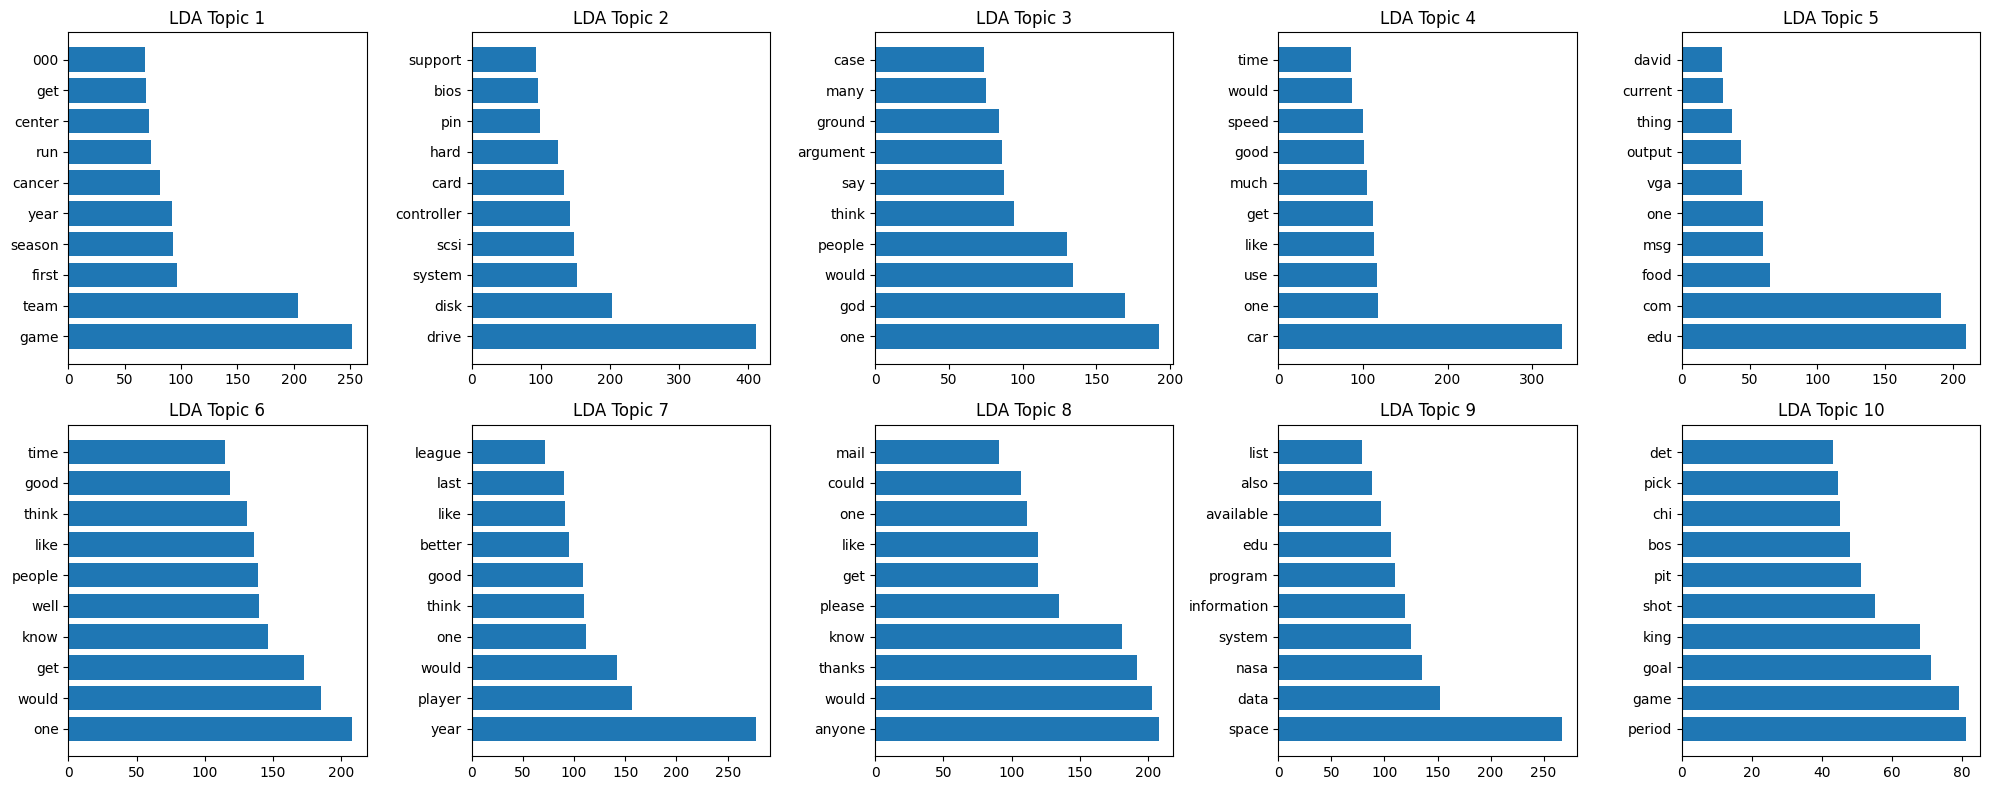

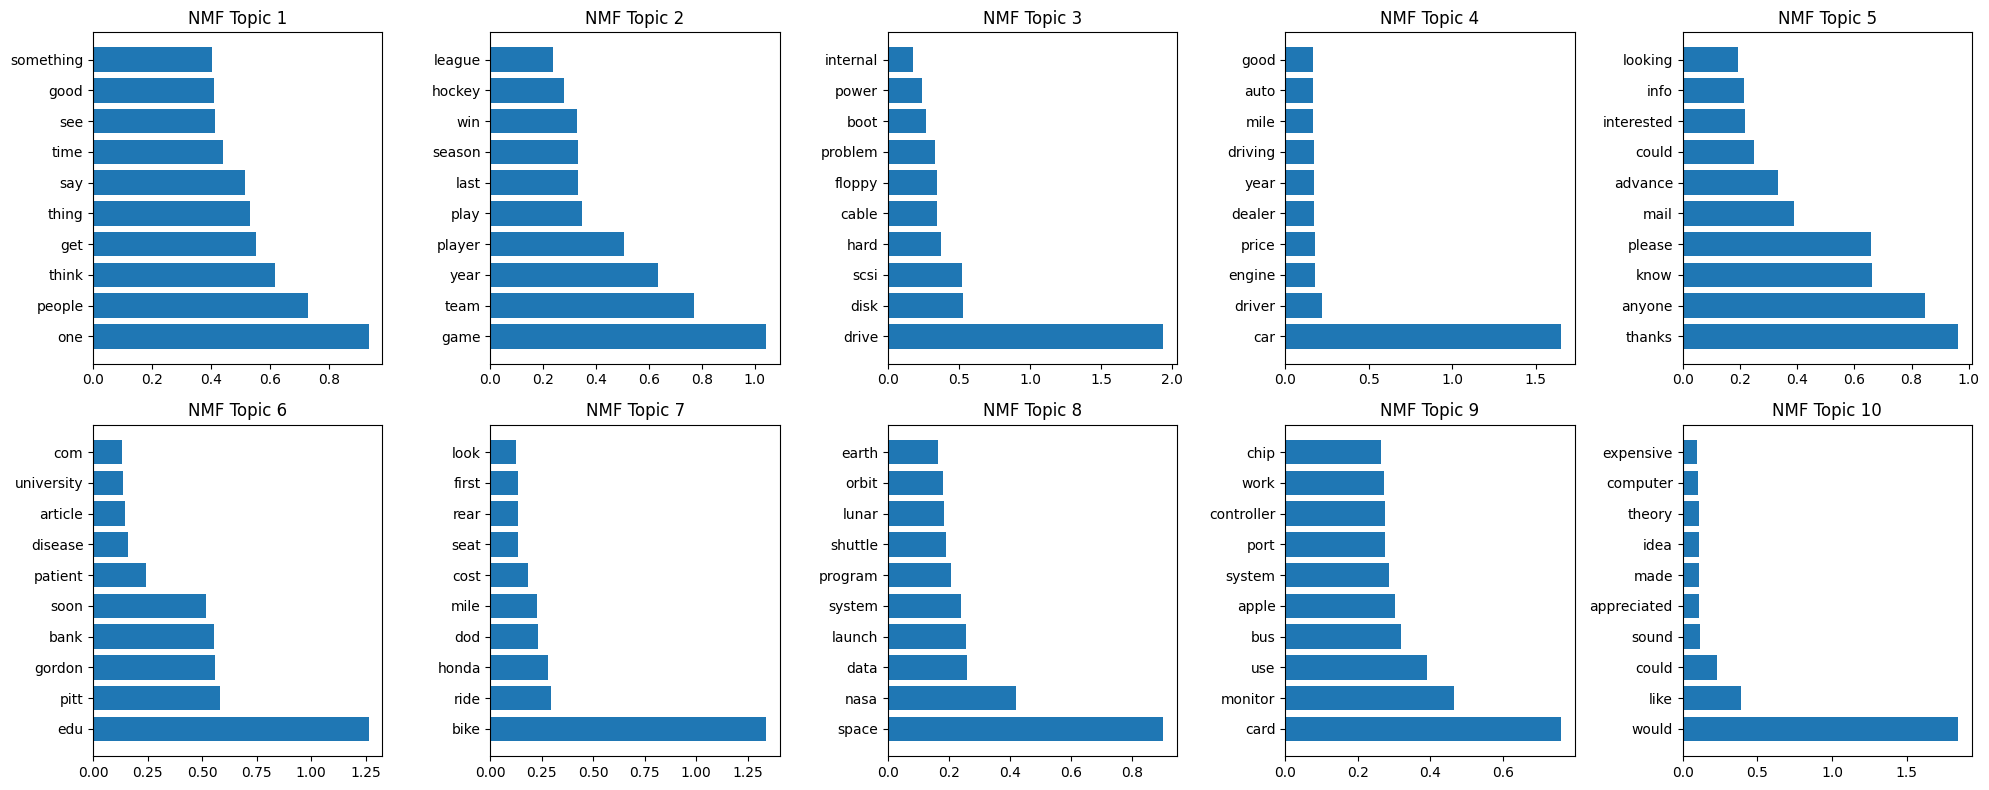

In [7]:
def plot_top_words(model, feature_names, title):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    for idx, topic in enumerate(model.components_):
        top_ids = topic.argsort()[:-11:-1]
        words = [feature_names[i] for i in top_ids]
        weights = topic[top_ids]
        axes[idx].barh(words[::-1], weights[::-1])
        axes[idx].set_title(f"{title} Topic {idx+1}")
        axes[idx].invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_top_words(lda, count_vec.get_feature_names_out(), "LDA")
plot_top_words(nmf, tfidf_vec.get_feature_names_out(), "NMF")

## 7. Word Clouds
Generate word clouds for the top 50 words of each topic.

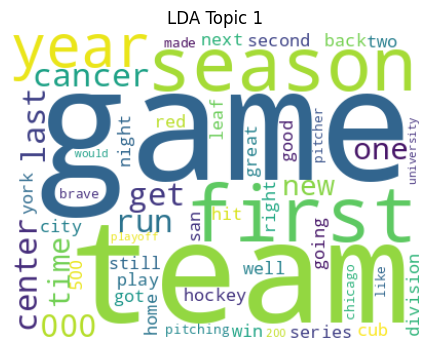

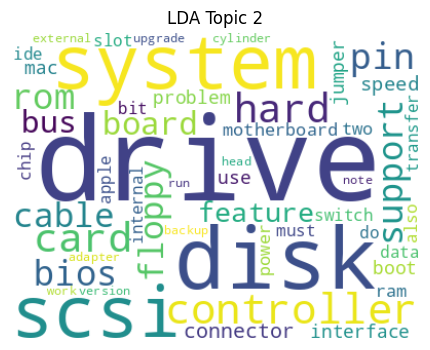

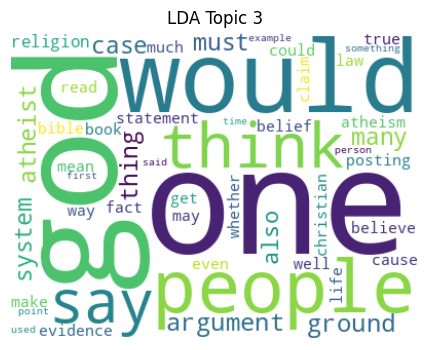

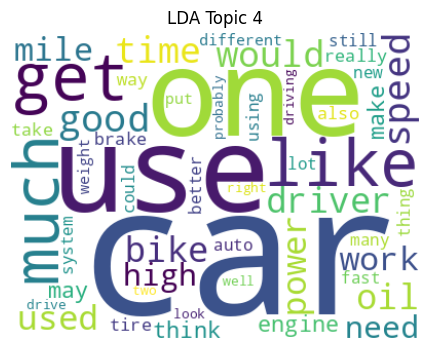

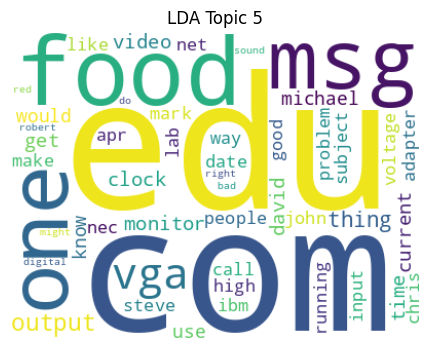

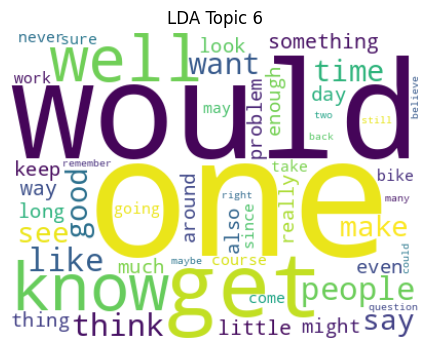

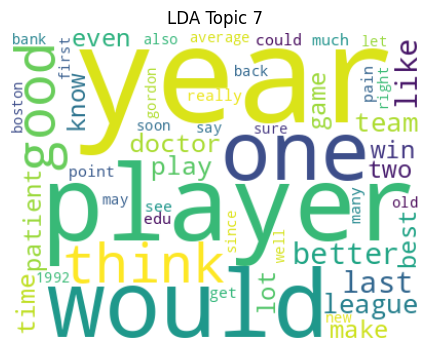

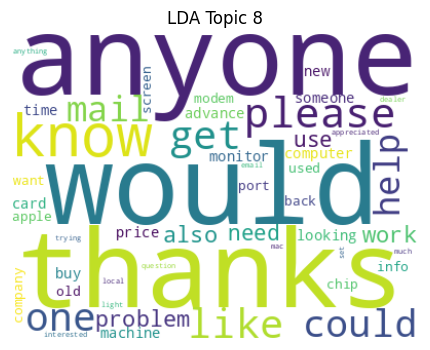

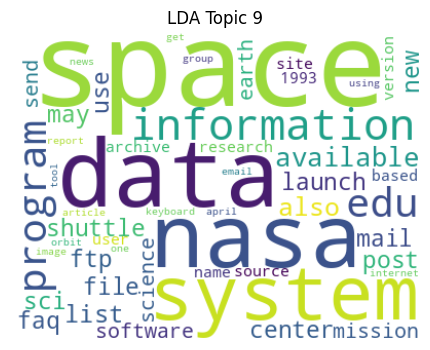

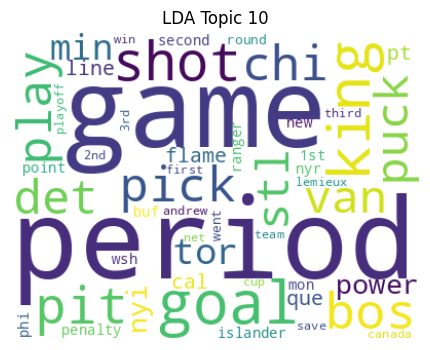

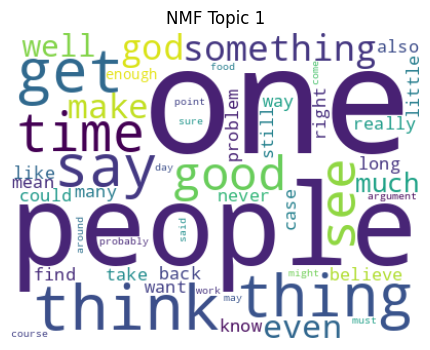

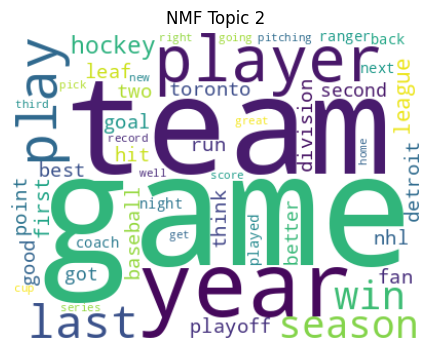

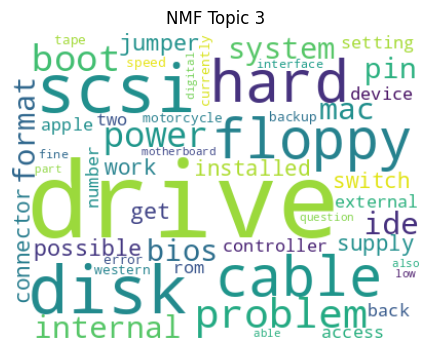

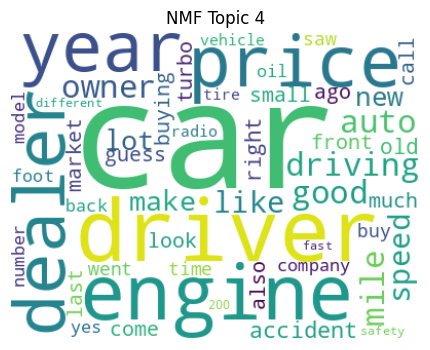

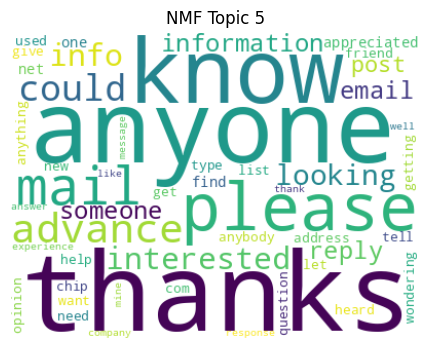

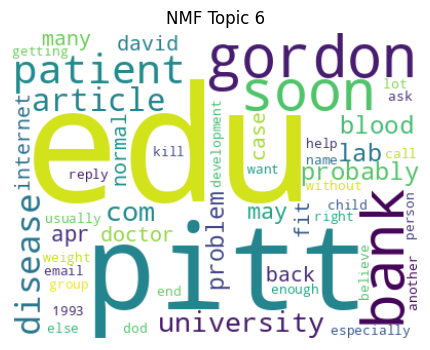

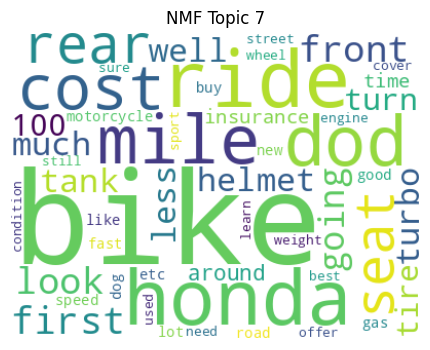

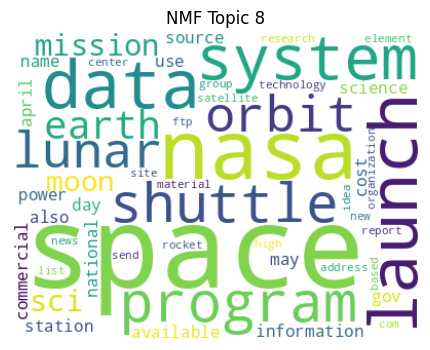

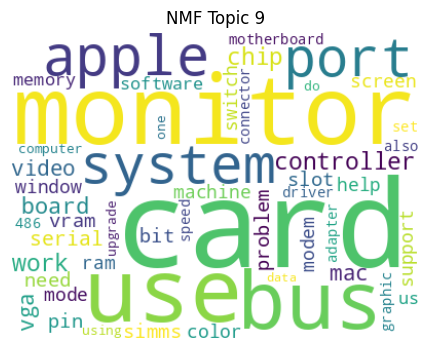

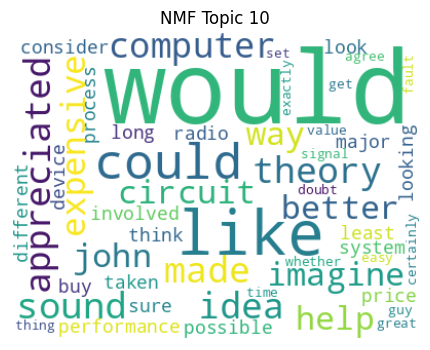

In [8]:
def plot_wordclouds(model, feature_names, label):
    for idx, topic in enumerate(model.components_):
        freqs = {feature_names[i]: topic[i] for i in topic.argsort()[:-51:-1]}
        wc = WordCloud(width=400, height=300, background_color='white')\
             .generate_from_frequencies(freqs)
        plt.figure(figsize=(6, 4))
        plt.imshow(wc, interpolation='bilinear')
        plt.title(f"{label} Topic {idx+1}")
        plt.axis('off')
        plt.show()

plot_wordclouds(lda, count_vec.get_feature_names_out(), "LDA")
plot_wordclouds(nmf, tfidf_vec.get_feature_names_out(), "NMF")